In [1]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [2]:
import pandas as pd
file = 'spam.csv'        
spam = pd.read_csv(file, encoding="latin-1", usecols=[0,1])

In [3]:
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import numpy as np
!pip install torchvision 

import torch

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import transformers as ppb

/share/apps/rc/software/Anaconda3/2020.07/envs/deepNLP2020/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [7]:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

In [8]:
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable


In [9]:
conda install -c conda-forge ipywidgets

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.5
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /share/apps/rc/software/Anaconda3/2020.07/envs/deepNLP2020

  added / updated specs:
    - ipywidgets


The following NEW packages will be INSTALLED:

  attrs              conda-forge/noarch::attrs-20.3.0-pyhd3deb0d_0
  bleach             conda-forge/noarch::bleach-3.2.1-pyh9f0ad1d_0
  defusedxml         conda-forge/noarch::defusedxml-0.6.0-py_0
  entrypoints        conda-forge/noarch::entrypoints-0.3-pyhd8ed1ab_1003
  importlib-metadata conda-forge/noarch::importlib-metadata-3.1.1-pyhd8ed1ab_0
  importlib_metadata conda-forge/noarch::importlib_metadata-3.1.1-hd8ed1ab_0
  ipywidgets         conda-forge/noarch::ipywidgets-7.5.1-pyh9f0ad1d_1
  jinja2             conda-forge/noarch::jinja2-2.11.2-pyh9f0ad1d_0
  jsonschema         conda-forge

In [10]:
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [11]:
import nltk
nltk.download('stopwords')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def clean_sentence(s):
    """Given a sentence remove its punctuation and stop words"""
    
    stop_words = set(stopwords.words('english'))
    s = s.translate(str.maketrans('','',string.punctuation))
    tokens = word_tokenize(s)
    cleaned_s = [w for w in tokens if w not in stop_words]
    return " ".join(cleaned_s[:10]) 

[nltk_data] Downloading package stopwords to /home/maczmt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
import re
spam["v2"] = spam["v2"].apply(clean_sentence)
spam["num_words"] = spam["v2"].apply(lambda s: len(re.findall(r'\w+', s))) 
spam["message_len"] = spam["v2"].apply(len) 

spam["v1"].replace({"ham": 0, "spam":1}, inplace=True)

spam.rename({"v1": "is_spam", "v2": "message"},axis=1, inplace=True)

In [13]:
tokenized = spam["message"].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))
tokenized

0       [101, 2175, 18414, 17583, 2391, 4689, 2800, 11...
1       [101, 7929, 2474, 2099, 16644, 15536, 2546, 10...
2       [101, 2489, 4443, 1016, 1059, 2243, 2135, 4012...
3       [101, 1057, 24654, 2360, 2220, 7570, 2099, 105...
4       [101, 20976, 1045, 2123, 2102, 2228, 3632, 214...
                              ...                        
5567    [101, 2023, 3416, 2051, 2699, 1016, 3967, 1057...
5568    [101, 2097, 1045, 1038, 2183, 9686, 24759, 516...
5569          [101, 12063, 6888, 2061, 19092, 15690, 102]
5570    [101, 1996, 3124, 7743, 2075, 1045, 6051, 2066...
5571           [101, 20996, 10258, 2049, 2995, 2171, 102]
Name: message, Length: 5572, dtype: object

In [14]:
max_len = tokenized.apply(len).max() 

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values]) 
padded

array([[  101,  2175, 18414, ...,     0,     0,     0],
       [  101,  7929,  2474, ...,     0,     0,     0],
       [  101,  2489,  4443, ...,     0,     0,     0],
       ...,
       [  101, 12063,  6888, ...,     0,     0,     0],
       [  101,  1996,  3124, ...,     0,     0,     0],
       [  101, 20996, 10258, ...,     0,     0,     0]])

In [15]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [16]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask) 
with torch.no_grad():
    encoder_hidden_state = model(input_ids, attention_mask=attention_mask)

In [17]:
X = encoder_hidden_state[0][:,0,:].numpy()
X = np.hstack((X, spam[["num_words", "message_len"]].to_numpy().reshape(-1, 2))) 
y = spam["is_spam"]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [19]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_train)
X_embedded.shape

(4179, 2)

In [20]:
# creating the dataframe for plotting
def creat_plotting_data(data, labels=y_train):
    """Creates a dataframe from the given data, used for plotting"""
    
    df = pd.DataFrame(data)
    df["is_spam"] = labels.to_numpy()
    df.rename({0:"v1", 1:"v2", 768:"num_words", 769: "message_len"}, axis=1, inplace=True)
    return df

plotting_data = creat_plotting_data(X_train)
plotting_data_embedded = creat_plotting_data(X_embedded)

In [26]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 283 kB 4.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


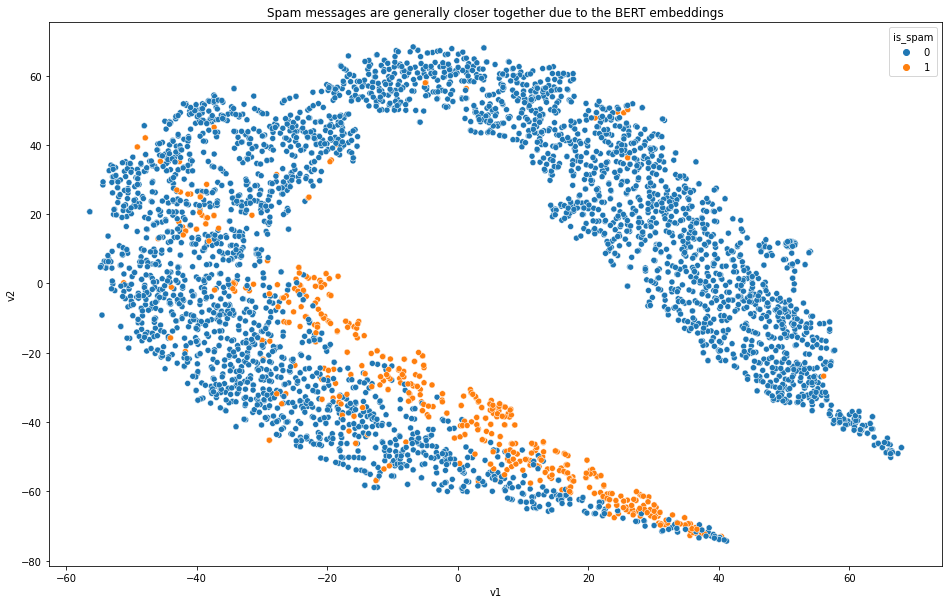

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
ax = sns.scatterplot(x="v1", y="v2", hue="is_spam", data=plotting_data_embedded)
ax.set(title = "Spam messages are generally closer together due to the BERT embeddings")
plt.show()

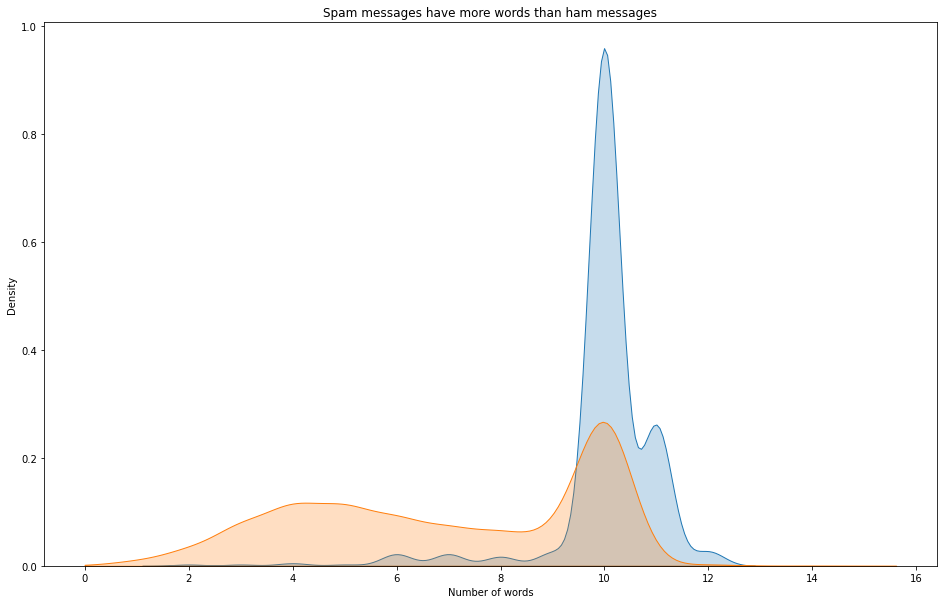

In [28]:
f,ax = plt.subplots(figsize=(16,10))
sns.kdeplot(plotting_data.loc[plotting_data.is_spam == 1, "num_words"], shade=True, label="Spam")
sns.kdeplot(plotting_data.loc[plotting_data.is_spam == 0, "num_words"], shade=True, label="Ham", clip=(0, 35)) # removing observations with message length above 35 because there is an outlier
ax.set(xlabel = "Number of words", ylabel = "Density",title = "Spam messages have more words than ham messages")
plt.show()

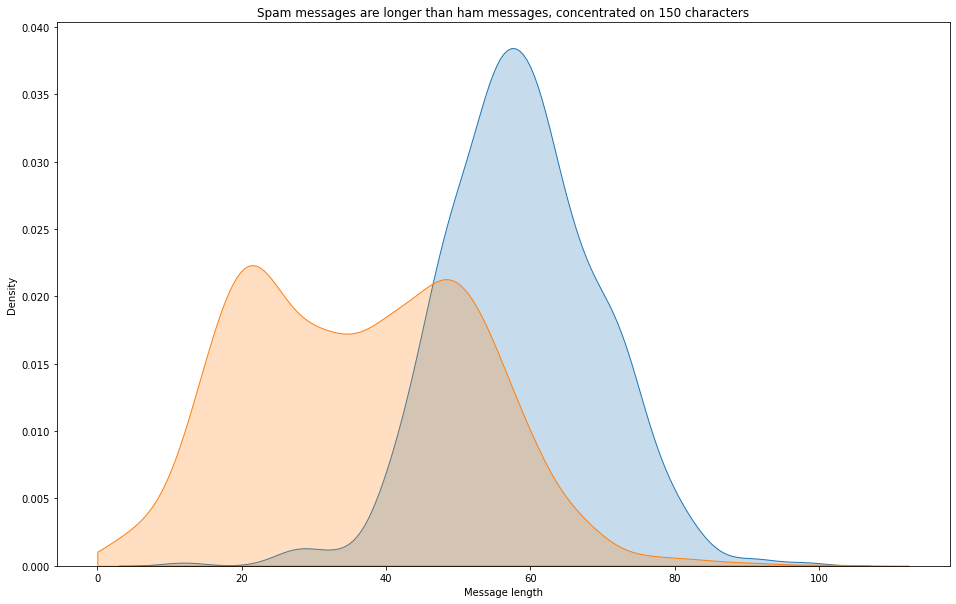

In [29]:
f,ax = plt.subplots(figsize=(16,10))
sns.kdeplot(plotting_data.loc[plotting_data.is_spam == 1, "message_len"], shade=True, label="Spam")
sns.kdeplot(plotting_data.loc[plotting_data.is_spam == 0, "message_len"], shade=True, label="Ham", clip=(0, 250)) 
ax.set(xlabel = "Message length", ylabel = "Density",title = "Spam messages are longer than ham messages, concentrated on 150 characters")
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=1500, class_weight="balanced", n_jobs=-1, random_state=42) # Create a baseline random forest (no cross-validation, no hyperparameter tuning)
rf_classifier.fit(X_train, y_train)
preds = rf_classifier.predict(X_test)

In [34]:
print(f"""Accuray: {round(accuracy_score(y_test, preds), 5) * 100}%
ROC-AUC: {round(roc_auc_score(y_test, preds), 5) * 100}%""")
print(classification_report(y_test, preds))

Accuray: 96.267%
ROC-AUC: 87.226%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1206
           1       0.97      0.75      0.84       187

    accuracy                           0.96      1393
   macro avg       0.96      0.87      0.91      1393
weighted avg       0.96      0.96      0.96      1393



In [ ]:
#reference: http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/
#output refeence: https://www.kaggle.com/mrlucasfischer/bert-the-spam-detector-that-uses-just-10-words